In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
survey_April20 = pd.read_csv('Data/ProlificAcademic/updated_data/April/CRISIS_Adult_April_2020.csv',index_col='ID')

In [25]:
survey_May20 = pd.read_csv('Data/ProlificAcademic/updated_data/May/CRISIS_Adult_May_2020.csv',index_col='ID')

In [26]:
survey_Nov20 = pd.read_csv('Data/ProlificAcademic/updated_data/November/CRISIS_Adult_November_2020.csv',index_col='ID')

C:\Users\MSUSERSL123\anaconda3\envs\crisisml\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
survey_April21 = pd.read_csv('Data/ProlificAcademic/updated_data/April_21/CRISIS_Adult_April_2021.csv',index_col='ID')

C:\Users\MSUSERSL123\anaconda3\envs\crisisml\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
# check individual row and column dimensions
print(survey_April20.shape)
print(survey_May20.shape)
print(survey_Nov20.shape)
print(survey_April21.shape)

(2868, 243)
(3148, 108)
(2223, 289)
(2125, 285)


In [45]:
# cant use merge as columns are not same
# survey_df = pd.merge(survey_April20, survey_Nov20, how="inner", on='ID')

### Find common participants across all groups

In [9]:
series_1 = pd.Series(np.intersect1d(survey_April20.index,survey_May20.index, assume_unique=True))
series_2 = pd.Series(np.intersect1d(survey_Nov20.index,survey_April21.index, assume_unique=True))
unique_ids = list(pd.Series(np.intersect1d(series_1,series_2,assume_unique=True)))
#pd.Series(np.intersect1d(pd.Series([1,2,3,5,42]), pd.Series([4,5,6,20,42])))a

In [10]:
len(unique_ids)

1184

In [11]:
# Test entry in a dataframe
print('location' in survey_April20.columns)
survey_April21.loc['00db60f1','location']

True


4.0

In [12]:
## filter rows
survey_April20 = survey_April20.loc[unique_ids]
survey_May20 = survey_May20.loc[unique_ids]
survey_Nov20 = survey_Nov20.loc[unique_ids]
survey_April21 = survey_April21.loc[unique_ids]

In [13]:
## Compare shapes after filtering
print(survey_April20.shape)
print(survey_May20.shape)
print(survey_Nov20.shape)
print(survey_April21.shape)

(1184, 243)
(1184, 108)
(1184, 289)
(1184, 285)


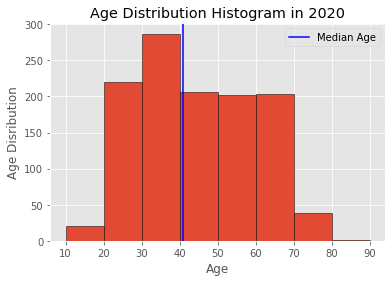

In [14]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
ages = survey_Nov20['age']
bins = list(range(10,100,10))
median_age = survey_Nov20['age'].median()
plt.hist(ages, bins=bins, edgecolor='black')
plt.axvline(median_age, color='blue', label="Median Age")
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram in 2020")
plt.legend()
plt.show()

In [15]:
# Find common columns - ignore May 20 as column size decreases drastically
surveys = [survey_April20,survey_Nov20,survey_April21]

common_cols_timeseries = list(set.intersection(*(set(df.columns) for df in surveys)))

In [16]:
# Python map function to subset columns for all dataframes

#subset_df = list(map(lambda s:s[common_cols_timeseries], surveys))
survey_April20_min = survey_April20[common_cols_timeseries]
survey_Nov20_min = survey_Nov20[common_cols_timeseries]
survey_April21_min = survey_April21[common_cols_timeseries]


In [17]:
survey_April21_min = survey_April21_min.add_suffix('_April21')

In [33]:
## Column datatypes

survey_April20_min.dtypes

symptoms___1                int64
disruptedsupports___11      int64
symptoms___5                int64
inpersonconvo_bin         float64
healthconditions___12       int64
                           ...   
disruptedsupportsother     object
timestamp1                 object
healthconditions___3        int64
diagnosedfamily___1         int64
disruptedsupports___9       int64
Length: 107, dtype: object

### Merge dataframes for longitudinal analysis

In [18]:
surveys_df = pd.merge(survey_April20_min, survey_Nov20_min, how="inner", left_index=True, right_index=True, suffixes=('_April20','_Nov20')).merge(survey_April21_min, left_index=True,right_index=True,  how="inner", suffixes=('','_April21'))

In [19]:
sorted(list(surveys_df.columns))

['age_April20',
 'age_April21',
 'age_Nov20',
 'age_bin_April20',
 'age_bin_April21',
 'age_bin_Nov20',
 'contactschanged_April20',
 'contactschanged_April21',
 'contactschanged_Nov20',
 'country_April20',
 'country_April21',
 'country_Nov20',
 'diagnosedfamily___1_April20',
 'diagnosedfamily___1_April21',
 'diagnosedfamily___1_Nov20',
 'diagnosedfamily___2_April20',
 'diagnosedfamily___2_April21',
 'diagnosedfamily___2_Nov20',
 'diagnosedfamily___3_April20',
 'diagnosedfamily___3_April21',
 'diagnosedfamily___3_Nov20',
 'difficultycancellations_April20',
 'difficultycancellations_April21',
 'difficultycancellations_Nov20',
 'difficultydistancing_April20',
 'difficultydistancing_April21',
 'difficultydistancing_Nov20',
 'disruptedsupports___10_April20',
 'disruptedsupports___10_April21',
 'disruptedsupports___10_Nov20',
 'disruptedsupports___11_April20',
 'disruptedsupports___11_April21',
 'disruptedsupports___11_Nov20',
 'disruptedsupports___12_April20',
 'disruptedsupports___12_April

In [116]:
surveys_df.shape

(1184, 321)

### Longitudinal Analysis to depict migration

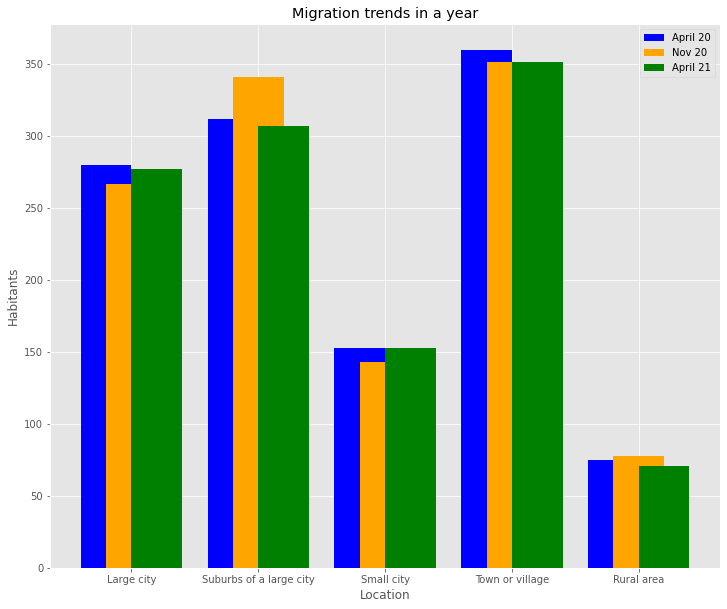

In [29]:
# create data
x = surveys_df['location_April20'].value_counts().sort_index().keys()
y1 = surveys_df['location_April20'].value_counts().sort_index().values
y2 = surveys_df['location_Nov20'].value_counts().sort_index().values
y3 = surveys_df['location_April21'].value_counts().sort_index().values
width = 0.4
  
# plot data in grouped manner of bar type
plt.figure(figsize=(12,10))
plt.title("Migration trends in a year")
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Large city', 'Suburbs of a large city', 'Small city', 'Town or village', 'Rural area'])
plt.xlabel("Location")
plt.ylabel("Habitants")
plt.legend(["April 20", "Nov 20", "April 21"])
plt.show()




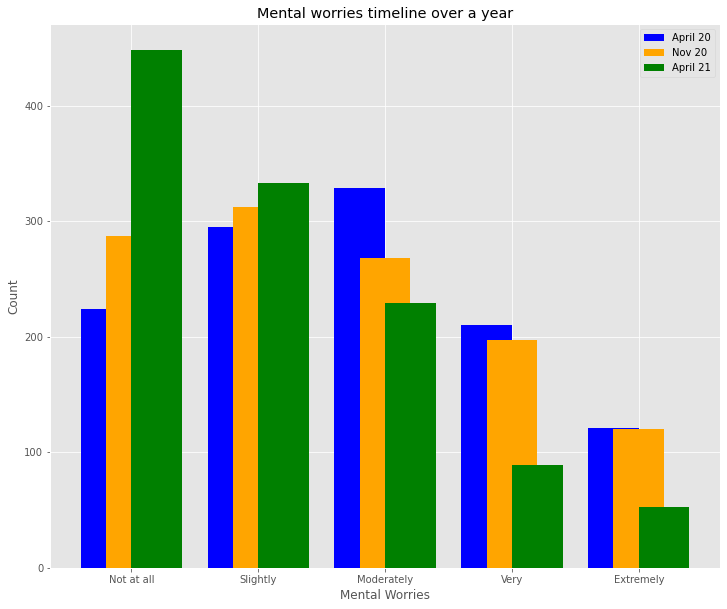

In [32]:
#Longtiduinal Analysis of covidstress and mental worries

# create data
x = surveys_df['worriedmental_April20'].value_counts().sort_index().keys()
y1 = surveys_df['worriedmental_April20'].value_counts().sort_index().values
y2 = surveys_df['worriedmental_Nov20'].value_counts().sort_index().values
y3 = surveys_df['worriedmental_April21'].value_counts().sort_index().values
width = 0.4
  
# plot data in grouped manner of bar type
plt.figure(figsize=(12,10))
plt.title("Mental worries timeline over a year")
plt.bar(x-0.2, y1, width, color='blue')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Not at all','Slightly','Moderately','Very','Extremely'])
plt.xlabel("Mental Worries")
plt.ylabel("Count")
plt.legend(["April 20", "Nov 20", "April 21"])
plt.show()




### Above chart shows people were not worried at all in April 2021 when vaccinations had started.

In [34]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()


count    762.000000
mean       0.022310
std        0.147786
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: losejob, dtype: float64
mode:  0    0.0
dtype: float64
0.0    745
1.0     17
Name: losejob, dtype: int64


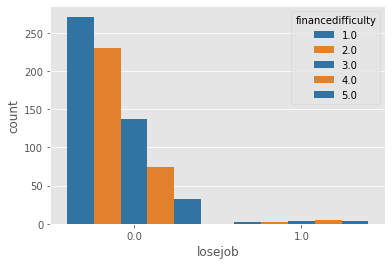

In [39]:
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(survey_April20, x = 'losejob', hue='financedifficulty', palette=c_palette)

In [42]:
survey_April20.loc[survey_April20['laidoff']==1].shape

(16, 243)